<a href="https://colab.research.google.com/github/anirudh6370/Autoencoder-on-Cifer10-dataset/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense,Input
from keras.optimizers import Adam
from keras.datasets import mnist,cifar10

In [ ]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
xtrain.shape

(50000, 32, 32, 3)

In [ ]:
h = 32
w = 32
c = 3

In [ ]:
xtrain = xtrain.reshape(-1,h*w*c)
xtest = xtest.reshape(-1,h*w*c)

In [ ]:
xtrain.shape,xtest.shape

((50000, 3072), (10000, 3072))

In [ ]:
h, w, c = 32, 32, 3  # Update these values with your actual dimensions
latent_dim = 64
latent_dim2 = 32
latent_dim3 = 16
inputs = Input(shape=(h * w * c,))
h_layer = Dense(latent_dim, activation='relu')(inputs)
h_layer2 = Dense(latent_dim2, activation='relu')(h_layer)
h_layer3 = Dense(latent_dim3, activation='relu')(h_layer2)
output = Dense(h * w * c, activation='sigmoid')(h_layer3)

autoencoder = Model(inputs, output)
autoencoder.compile(optimizer = Adam(1e-3),loss = "binary_crossentropy")
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_5 (Dense)             (None, 64)                196672    
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 3072)              52224     
                                                                 
Total params: 251504 (982.44 KB)
Trainable params: 251504 (982.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = autoencoder.fit(xtrain,xtrain,epochs =32,batch_size = 50,validation_data = (xtest,xtest))

Epoch 1/32
1000/1000 [==============================] - 6s 4ms/step - loss: 0.6307 - val_loss: 0.6140
Epoch 2/32
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6071 - val_loss: 0.6052
Epoch 3/32
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6031 - val_loss: 0.6037
Epoch 4/32
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6028 - val_loss: 0.6036
Epoch 5/32
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6025 - val_loss: 0.6019
Epoch 6/32
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6008 - val_loss: 0.6022
Epoch 7/32
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6006 - val_loss: 0.6011
Epoch 8/32
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6002 - val_loss: 0.6008
Epoch 9/32
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5987 - val_loss: 0.5989
Epoch 10/32
1000/1000 [==============================] - 5s 5ms/step - loss: 0.597

In [ ]:
xtest_pred = autoencoder.predict(xtest)

313/313 [==============================] - 1s 2ms/step


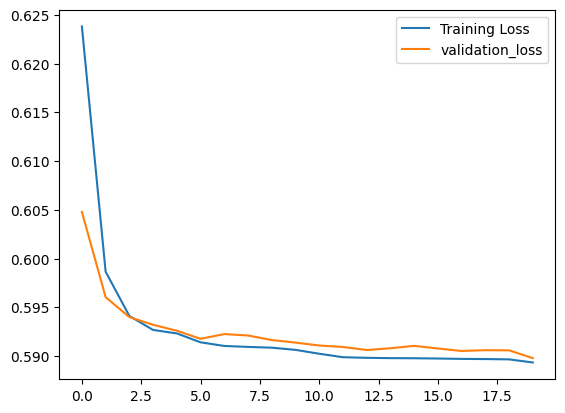

In [ ]:
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="validation_loss")
plt.legend()

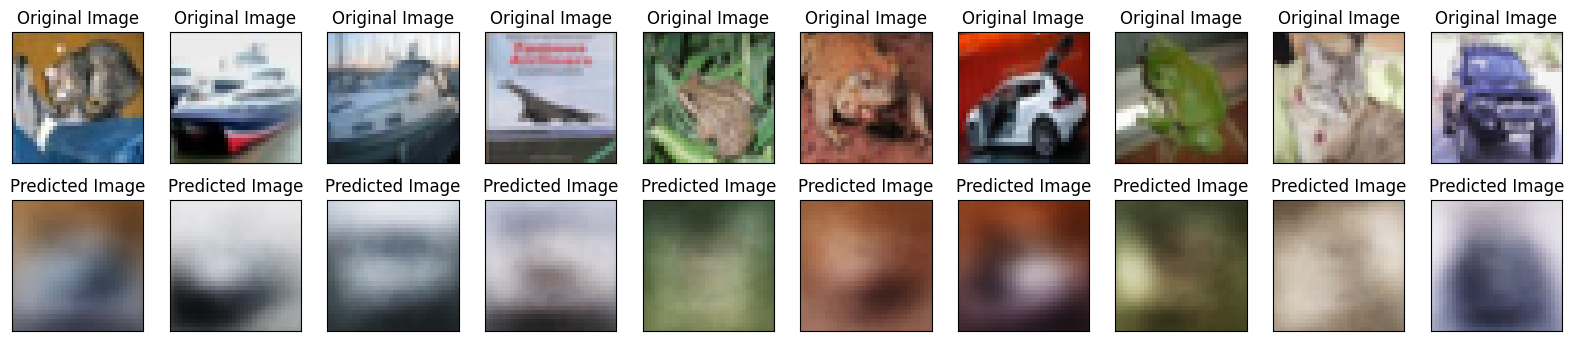

In [ ]:
h=32
w =32
c =3

n=10 ## how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  ## display original
  ax = plt.subplot(2, n, i + 1)
  ax.set_title("Original Image")
  plt.imshow(xtest[i].reshape(h,w,c))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ## display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  ax.set_title("Predicted Image")
  plt.imshow(xtest_pred[i].reshape(h, w,c))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("simple_autoencoder.png")